In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:>

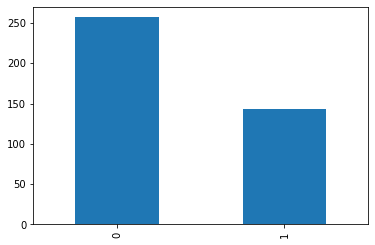

In [3]:
df.Purchased.value_counts().plot(kind='bar')


In [4]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [5]:
m = LogisticRegression()
m.fit(xtrain, ytrain)

LogisticRegression()

In [6]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

0.875

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
ypred = m.predict(xtest)

In [9]:
import seaborn as sns

In [10]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[46  3]
 [ 7 24]]


In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


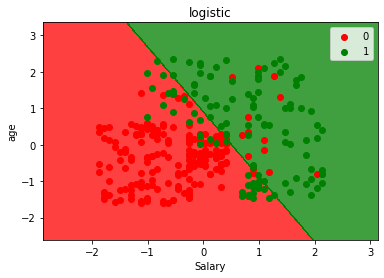

In [12]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')

In [13]:
import plotly.express as px

In [14]:
df.columns.tolist()

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [15]:
fig = px.scatter_3d(df,x='Age',y='EstimatedSalary',z='Purchased')
fig.write_html('mall data.html',auto_open=True)